# GWP 1

## Step 1

In [55]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numba import jit, njit
import pandas as pd

### 5. Price an ATM European call and put using a binomial tree

In [56]:
def binomial_call_full(S_o, K, T, r, sigma, N):
  dt = T / N
  u = (np.exp(sigma * np.sqrt(dt)))
  d = (np.exp(-sigma * np.sqrt(dt)))
  p = (np.exp(r * dt) - d) / (u - d)
  C = np.zeros([N+1, N+1])
  S = np.zeros([N+1, N+1])

  for i in range(0 , N+1):
    C[N, i] = max(S_o * (u ** (i)) * (d ** (N-i)) - K, 0)
    S[N, i] = S_o * (u ** (i)) * (d ** (N-i))

  for j in range(N-1, -1, -1):
    for i in range(0, j+1):
      C[j, i] = np.exp(-r * dt) * (p * C[j+1, i+1] + (1-p) * C[j+1, i])
      S[j, i] = S_o * (u ** (i)) * (d ** (j-i))

  return C[0,0], C, S

In [57]:
call_price_array = []
for N in [1, 10, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]:
    call_price, C, S = binomial_call_full(100, 100, 0.25, 0.05, 0.20, N)
    call_price_array.append(call_price)
    print("With N = {:3d}, the call price is {:.2f}".format(N, call_price))

With N =   1, the call price is 5.59
With N =  10, the call price is 4.52
With N = 100, the call price is 4.61
With N = 200, the call price is 4.61
With N = 300, the call price is 4.61
With N = 400, the call price is 4.61
With N = 500, the call price is 4.61
With N = 600, the call price is 4.61
With N = 700, the call price is 4.61
With N = 800, the call price is 4.61
With N = 900, the call price is 4.61
With N = 1000, the call price is 4.61


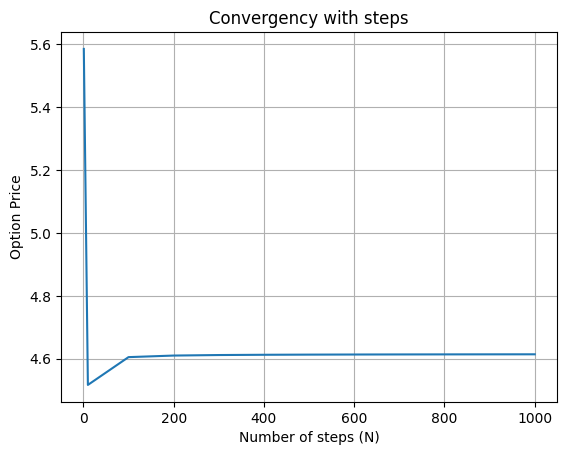

In [58]:
import matplotlib.pyplot as plt

N = [1, 10, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
plt.plot(N, np.array(call_price_array))
plt.title("Convergency with steps")
plt.xlabel("Number of steps (N)")
plt.ylabel("Option Price")
plt.grid(True)
plt.show()

In [59]:
def binomial_put_full(S_o, K, T, r, sigma, N):
  dt = T / N
  u = (np.exp(sigma * np.sqrt(dt)))
  d = (np.exp(-sigma * np.sqrt(dt)))
  p = (np.exp(r * dt) - d) / (u - d)
  P = np.zeros([N+1, N+1])
  S = np.zeros([N+1, N+1])

  for i in range(0, N + 1):
    P[N, i] = max(K - (S_o * (u ** (i)) * (d ** (N-i))), 0)
    S[N, i] = S_o * (u ** (i)) * (d ** (N-i))

  for j in range(N - 1, -1, -1):
    for i in range(0, j + 1):
      P[j, i] = np.exp(-r * dt) * (p * P[j + 1, i + 1] + (1 - p) * P[j + 1, i])
      S[j, i] = S_o * (u ** (i)) * (d ** (j-i))

  return P[0, 0], P, S

In [60]:
put_price_array = []
for N in [1, 10, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]:
    put_price, P, S = binomial_put_full(100, 100, 0.25, 0.05, 0.20, N)
    put_price_array.append(put_price)
    print("With N = {:3d}, the put price is {:.2f}".format(N, put_price))

With N =   1, the put price is 4.34
With N =  10, the put price is 3.27
With N = 100, the put price is 3.36
With N = 200, the put price is 3.37
With N = 300, the put price is 3.37
With N = 400, the put price is 3.37
With N = 500, the put price is 3.37
With N = 600, the put price is 3.37
With N = 700, the put price is 3.37
With N = 800, the put price is 3.37
With N = 900, the put price is 3.37
With N = 1000, the put price is 3.37


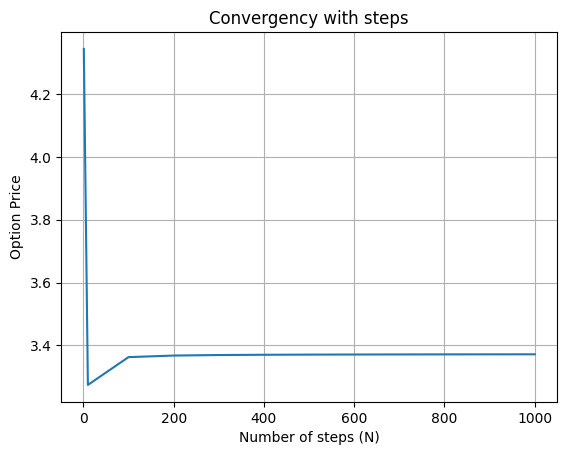

In [61]:
import matplotlib.pyplot as plt

N = [1, 10, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
plt.plot(N, np.array(put_price_array))
plt.title("Convergency with steps")
plt.xlabel("Number of steps (N)")
plt.ylabel("Option Price")
plt.grid(True)
plt.show()

### 6. Compute the Greek Delta for the European call and European put at time 0

In [62]:
def call_option_delta(S_o, K, T, r, sigma, N):
  dt = T / N
  u = (np.exp(sigma * np.sqrt(dt)))
  d = (np.exp(-sigma * np.sqrt(dt)))
  p = (np.exp(r * dt) - d) / (u - d)
  C = np.zeros([N+1, N+1])
  S = np.zeros([N+1, N+1])
  delta = np.zeros([N, N])

  for i in range(0, N+1):
    C[N, i] = max(S_o * (u ** (i)) * (d ** (N-i)) - K, 0)
    S[N, i] = S_o * (u ** (i)) * (d ** (N-i))

  for j in range(N-1, -1, -1):
    for i in range(0, j+1):
      C[j, i] = np.exp(-r * dt) * (p * C[j+1, i+1] + (1-p) * C[j+1, i])
      S[j, i] = S_o * (u ** (i)) * (d ** (j-i))
      delta[j, i] = (C[j + 1, i + 1] - C[j + 1, i]) / (S[j + 1, i + 1] - S[j + 1, i])

  return C[0, 0], C, S, delta[0, 0]

In [63]:
call_price, C, S, delta = call_option_delta(100, 100, 0.25, 0.05, 0.20, 100)
print("The delta for call option at the time 0 is {:.2f}".format(delta))

The delta for call option at the time 0 is 0.57


In [64]:
def put_option_delta(S_o, K, T, r, sigma, N):
  dt = T / N
  u = (np.exp(sigma * np.sqrt(dt)))
  d = (np.exp(-sigma * np.sqrt(dt)))
  p = (np.exp(r * dt) - d) / (u - d)
  C = np.zeros([N+1, N+1])
  S = np.zeros([N+1, N+1])
  delta = np.zeros([N, N])

  for i in range(0, N + 1):
    P[N, i] = max(K - (S_o * (u ** (i)) * (d ** (N-i))), 0)
    S[N, i] = S_o * (u ** (i)) * (d ** (N-i))

  for j in range(N - 1, -1, -1):
    for i in range(0, j + 1):
      P[j, i] = np.exp(-r * dt) * (p * P[j + 1, i + 1] + (1 - p) * P[j + 1, i])
      S[j, i] = S_o * (u ** (i)) * (d ** (j-i))
      delta[j, i] = (P[j + 1, i + 1] - P[j + 1, i]) / (S[j + 1, i + 1] - S[j + 1, i])

  return P[0, 0], P, S, delta[0, 0]

In [65]:
put_price, P, S, delta = put_option_delta(100, 100, 0.25, 0.05, 0.20, 100)
print("The delta for put option at the time 0 is {:.2f}".format(delta))

The delta for put option at the time 0 is -0.43


### 7. Sensitivity of option prices with differnt volatility

In [66]:
call_price, C, S = binomial_call_full(100, 100, 0.20, 0.05, 0.25, 100)
print("The Call option price with 20% volatility is {:.2f}".format(call_price))
call_price, C, S = binomial_call_full(100, 100, 0.25, 0.05, 0.25, 100)
print("The Call option price with 25% volatility is {:.2f}".format(call_price))

The Call option price with 20% volatility is 4.94
The Call option price with 25% volatility is 5.59


In [67]:
put_price, C, S = binomial_put_full(100, 100, 0.20, 0.05, 0.25, 100)
print("The put option price with 20% volatility is {:.2f}".format(put_price))
put_price, C, S = binomial_put_full(100, 100, 0.25, 0.05, 0.25, 100)
print("The put option price with 25% volatility is {:.2f}".format(put_price))

The put option price with 20% volatility is 3.94
The put option price with 25% volatility is 4.34


### 8. Price an ATM American call and put using a binomial tree:


a. Choose the number of steps in the tree you see convenient to achieve
reliable estimates.

b. Briefly describe the overall process, as well as a reason why you choose
that number of steps in the tree.

$ S_0 = 100; K=100; r = 5\%; σ = 20\%; $ T = 3 months

In [68]:
# njit
def american_option_binomial(S_ini: int, K: int, T: float, r: float, sigma: float, N: int, opttype: str):
    dt: float = T / N
    u: float = np.exp(sigma * np.sqrt(dt))
    d: float = np.exp(-sigma * np.sqrt(dt))
    p: float = (np.exp(r * dt) - d) / (u - d)
    C = np.zeros([N + 1, N + 1])
    S = np.zeros([N + 1, N + 1])

    for i in range(0, N + 1):
        S[N, i] = S_ini * (u ** (i)) * (d ** (N - i))
        if opttype == "C":
            C[N, i] = max(S[N, i] - K, 0)
        else:
            C[N, i] = max(K - S[N, i], 0)

    for j in range(N - 1, -1, -1):
        for i in range(0, j + 1):
            C[j, i] = np.exp(-r * dt) * (
                p * C[j + 1, i + 1] + (1 - p) * C[j + 1, i]
            )
            S[j, i] = (
                S_ini * (u ** (i)) * (d ** (j - i))
            )
            if opttype == "C":
                C[j, i] = max(
                    C[j, i], S[j, i] - K
                )
            else:
                C[j, i] = max(
                    C[j, i], K - S[j, i]
                )

    return C[0, 0], C, S

In [69]:
am_call_prices = []
am_put_prices = []
steps = [2**i for i in range(12)]
S0 = 100
K = 100
T = 0.25
r = 0.05
sig = 0.2
for N in steps:
  am_call_price, _, _ = american_option_binomial(S0, K, T, r, sig, N, 'C')
  am_put_price, _, _ = american_option_binomial(S0, K, T, r, sig, N, 'P')
  am_call_prices.append(am_call_price)
  am_put_prices.append(am_put_price)

In [70]:
steps

[1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048]

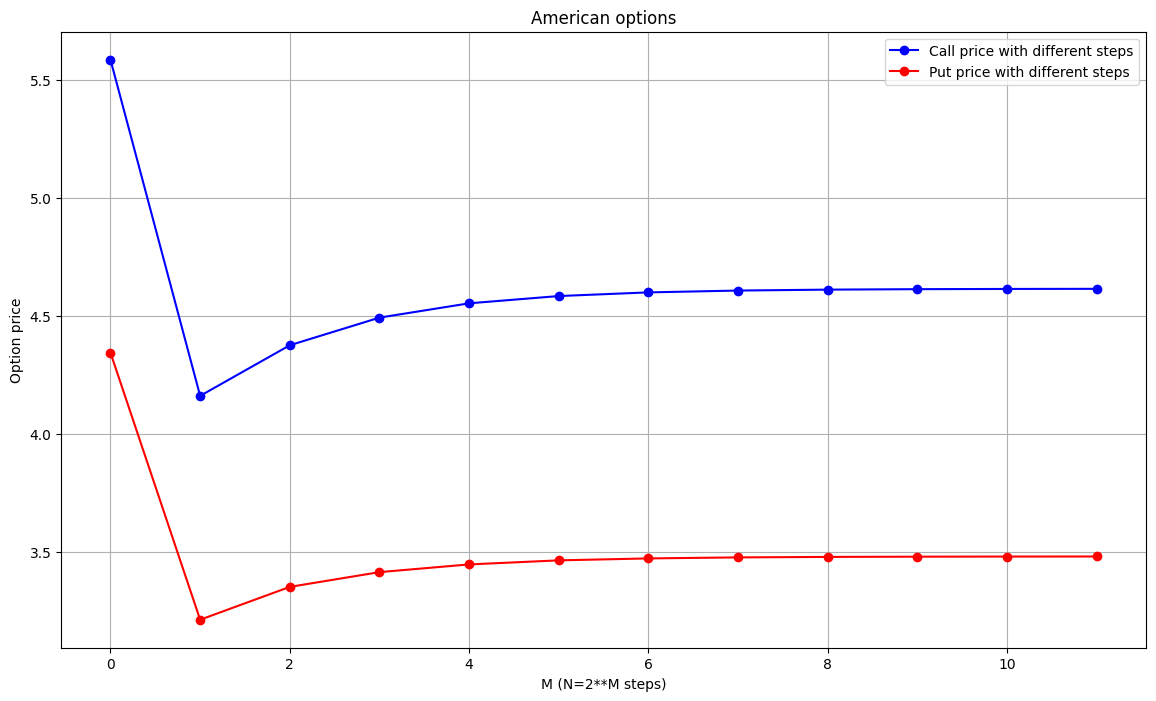

In [71]:
plt.figure(figsize=(14,8))
plt.plot(np.log2(steps), am_call_prices, color='blue', label='Call price with different steps', marker='o')
plt.plot(np.log2(steps), am_put_prices, color='red', label='Put price with different steps', marker='o')
plt.xlabel('M (N=2**M steps)')
plt.ylabel('Option price')
plt.title('American options')
plt.legend()
plt.grid()

In [72]:
am_C_prices = pd.Series(np.round(am_call_prices, 2), index=steps)
am_C_prices

1       5.59
2       4.16
4       4.38
8       4.49
16      4.55
32      4.58
64      4.60
128     4.61
256     4.61
512     4.61
1024    4.61
2048    4.61
dtype: float64

In [73]:
for idx in am_C_prices.index:
  print(f'N={idx},', ' '*(5 - len(str(idx))), f'C_price={am_C_prices.loc[idx]}')

N=1,      C_price=5.59
N=2,      C_price=4.16
N=4,      C_price=4.38
N=8,      C_price=4.49
N=16,     C_price=4.55
N=32,     C_price=4.58
N=64,     C_price=4.6
N=128,    C_price=4.61
N=256,    C_price=4.61
N=512,    C_price=4.61
N=1024,   C_price=4.61
N=2048,   C_price=4.61


In [74]:
am_P_prices = pd.Series(np.round(am_put_prices, 2), index=steps)
am_P_prices

1       4.34
2       3.21
4       3.35
8       3.41
16      3.45
32      3.46
64      3.47
128     3.48
256     3.48
512     3.48
1024    3.48
2048    3.48
dtype: float64

In [75]:
for idx in am_P_prices.index:
  print(f'N={idx},', ' '*(5 - len(str(idx))), f'P_price={am_P_prices.loc[idx]}')

N=1,      P_price=4.34
N=2,      P_price=3.21
N=4,      P_price=3.35
N=8,      P_price=3.41
N=16,     P_price=3.45
N=32,     P_price=3.46
N=64,     P_price=3.47
N=128,    P_price=3.48
N=256,    P_price=3.48
N=512,    P_price=3.48
N=1024,   P_price=3.48
N=2048,   P_price=3.48


In [76]:
np.array(am_call_prices) + K*np.exp(-r*T)

array([104.34369788, 102.91842761, 103.13311148, 103.25022047,
       103.31090406, 103.34170483, 103.35720878, 103.36498514,
       103.36887923, 103.37082772, 103.37180233, 103.37228973])

In [77]:
K*np.exp(-r*T)

98.75778004938815

In [78]:
np.array(am_put_prices) + S0

array([104.34369788, 103.21152653, 103.3507555 , 103.41331085,
       103.44600893, 103.46323824, 103.47150587, 103.47576623,
       103.47781174, 103.47884997, 103.47935386, 103.47960817])

### 9. Compute the Greek Delta for the American call and American put at time 0:

In [79]:
# njit
def american_option_with_delta(S_ini: int, K: int, T: float, r: float, sigma: float, N: int, opttype: str):
    dt: float = T / N
    u: float = np.exp(sigma * np.sqrt(dt))
    d: float = np.exp(-sigma * np.sqrt(dt))
    p: float = (np.exp(r * dt) - d) / (u - d)
    C = np.zeros([N + 1, N + 1])
    S = np.zeros([N + 1, N + 1])
    Delta = np.zeros([N, N])

    for i in range(0, N + 1):
        S[N, i] = S_ini * (u ** (i)) * (d ** (N - i))
        if opttype == "C":
            C[N, i] = max(S[N, i] - K, 0)
        else:
            C[N, i] = max(K - S[N, i], 0)

    for j in range(N - 1, -1, -1):
        for i in range(0, j + 1):
            C[j, i] = np.exp(-r * dt) * (
                p * C[j + 1, i + 1] + (1 - p) * C[j + 1, i]
            )
            S[j, i] = (
                S_ini * (u ** (i)) * (d ** (j - i))
            )
            if opttype == "C":
                C[j, i] = max(
                    C[j, i], S[j, i] - K
                )
            else:
                C[j, i] = max(
                    C[j, i], K - S[j, i]
                )

            Delta[j, i] = (C[j + 1, i + 1] - C[j + 1, i]) / (
                S[j + 1, i + 1] - S[j + 1, i]
            )

    return C[0, 0], C, S, Delta

In [80]:
am_call_price, _, _, delta_call = american_option_with_delta(S0, K, T, r, sig, N=256, opttype='C')
print("The delta for call option at the time 0 is {:.3f}".format(delta_call[0][0]))
am_put_price, _, _, delta_put = american_option_with_delta(S0, K, T, r, sig, N=256, opttype='P')
print("The delta for call option at the time 0 is {:.3f}".format(delta_put[0][0]))

The delta for call option at the time 0 is 0.569
The delta for call option at the time 0 is -0.450


### 10. Sensitivity of American option prices with differnt volatility

In [81]:
am_call_price_v20, C, S = american_option_binomial(S0, K, T, r, 0.20, N=256, opttype='C')
print("The Call option price with 20% volatility is {:.2f}".format(am_call_price_v20))
am_put_price_v20, C, S = american_option_binomial(S0, K, T, r, 0.20, N=256, opttype='P')
print("The Put option price with 20% volatility is {:.2f}".format(am_put_price_v20))
am_call_price_v25, C, S = american_option_binomial(S0, K, T, r, 0.25, N=256, opttype='C')
print("The Call option price with 25% volatility is {:.2f}".format(am_call_price_v25))
am_put_price_v25, C, S = american_option_binomial(S0, K, T, r, 0.25, N=256, opttype='P')
print("The Put option price with 25% volatility is {:.2f}".format(am_put_price_v25))

The Call option price with 20% volatility is 4.61
The Put option price with 20% volatility is 3.48
The Call option price with 25% volatility is 5.59
The Put option price with 25% volatility is 4.46


### Q11:


If the team answered Q1 as “Yes” (i.e. that put-call parity holds), then show that the European call and put satisfy put-call parity. Comment on the reasons
why/why not the parity holds, as well as potential motives.

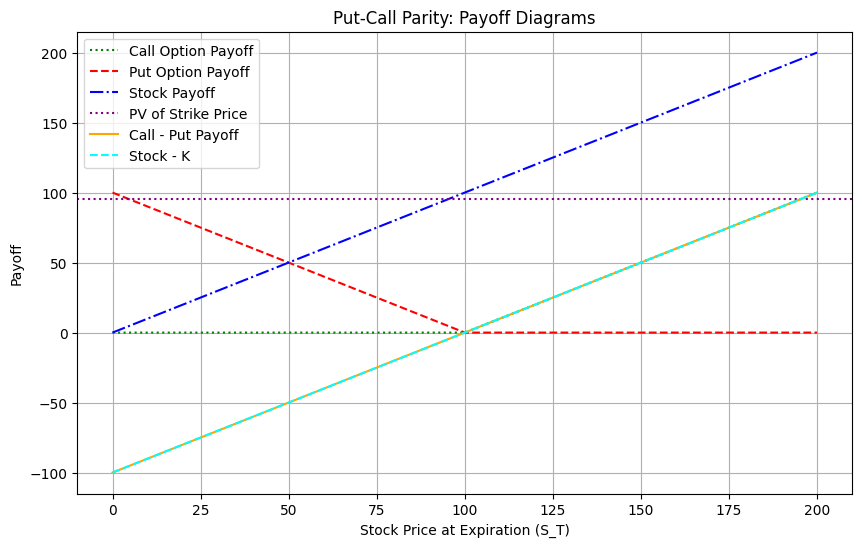

In [82]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
S = np.linspace(0, 200, 400)  # Range of stock prices at expiration
K = 100  # Strike price
r = 0.05  # Risk-free interest rate
T = 1  # Time to expiration in years
PV_K = K * np.exp(-r * T)  # Present value of the strike price

# Payoffs
call_payoff = np.maximum(S - K, 0)
put_payoff = np.maximum(K - S, 0)
stock_payoff = S
bond_payoff = PV_K * np.ones_like(S)

# Combined positions
call_minus_put = call_payoff - put_payoff
stock_minus_bond = stock_payoff - K

# Plotting
plt.figure(figsize=(10, 6))

# Plot the call option payoff
plt.plot(S, call_payoff, label='Call Option Payoff', linestyle='dotted', color='g')

# Plot the put option payoff
plt.plot(S, put_payoff, label='Put Option Payoff', linestyle='--', color='r')

# Plot the stock payoff
plt.plot(S, stock_payoff, label='Stock Payoff', linestyle='-.', color='b')

# Plot the present value of the strike price
plt.axhline(y=PV_K, label='PV of Strike Price', linestyle=':', color='purple')

# Plot the combined position (call - put)
plt.plot(S, call_minus_put, label='Call - Put Payoff', linestyle='-', color='orange')

# Plot the combined position (stock - present value of strike price)
plt.plot(S, stock_minus_bond, label='Stock - K', linestyle='--', color='cyan')

# Adding labels and title
plt.xlabel('Stock Price at Expiration (S_T)')
plt.ylabel('Payoff')
plt.title('Put-Call Parity: Payoff Diagrams')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


### Q13

Confirm that the European call is less than or equal to the American call. Show
the difference if any and comment on the reasons for this difference, would this
always be the case?

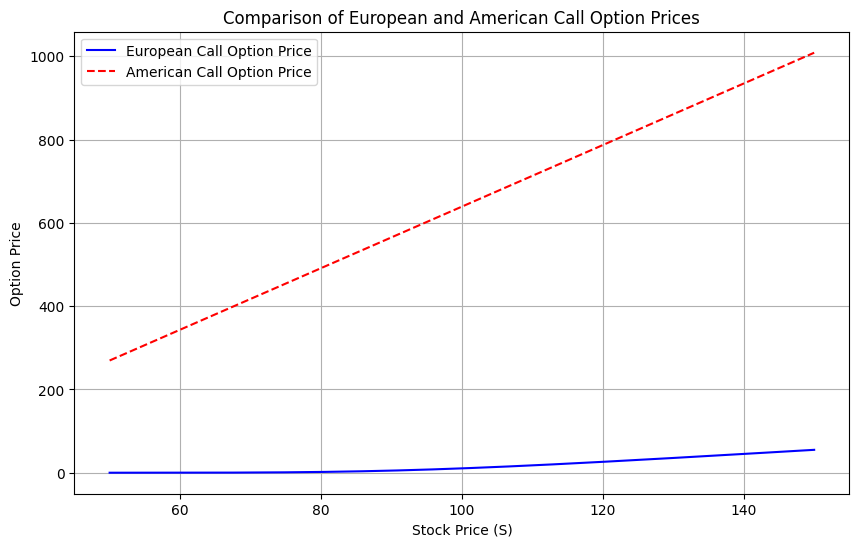

In [83]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Parameters
S = np.linspace(50, 150, 400)  # Range of stock prices
K = 100  # Strike price
r = 0.05  # Risk-free interest rate
T = 1  # Time to expiration (in years)
sigma = 0.2  # Volatility

# Black-Scholes formula for European call option
def european_call_price(S, K, r, T, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    call_price = S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    return call_price

# Binomial Tree model for American call option
def american_call_price(S, K, r, T, sigma, N=100):
    dt = T / N
    u = np.exp(sigma * np.sqrt(dt))
    d = 1 / u
    p = (np.exp(r * dt) - d) / (u - d)

    # Initialize asset prices at maturity
    asset_prices = np.zeros(N + 1)
    for i in range(N + 1):
        asset_prices[i] = S * (u ** (N - i)) * (d ** i)

    # Initialize option values at maturity
    option_values = np.maximum(0, asset_prices - K)

    # Step back through the tree
    for j in range(N - 1, -1, -1):
        for i in range(j + 1):
            option_values[i] = np.exp(-r * dt) * (p * option_values[i] + (1 - p) * option_values[i + 1])
            option_values[i] = np.maximum(option_values[i], asset_prices[i] - K)  # Early exercise

    return option_values[0]

# Calculate option prices
european_call_prices = european_call_price(S, K, r, T, sigma)
american_call_prices = np.array([american_call_price(s, K, r, T, sigma) for s in S])

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(S, european_call_prices, label='European Call Option Price', color='blue')
plt.plot(S, american_call_prices, label='American Call Option Price', color='red', linestyle='--')
plt.xlabel('Stock Price (S)')
plt.ylabel('Option Price')
plt.title('Comparison of European and American Call Option Prices')
plt.legend()
plt.grid(True)
plt.show()


### Q14

Confirm that the European put is less than or equal to the American put. Show
the difference if any and comment on the reasons for this difference. For
example, would this always be the case?

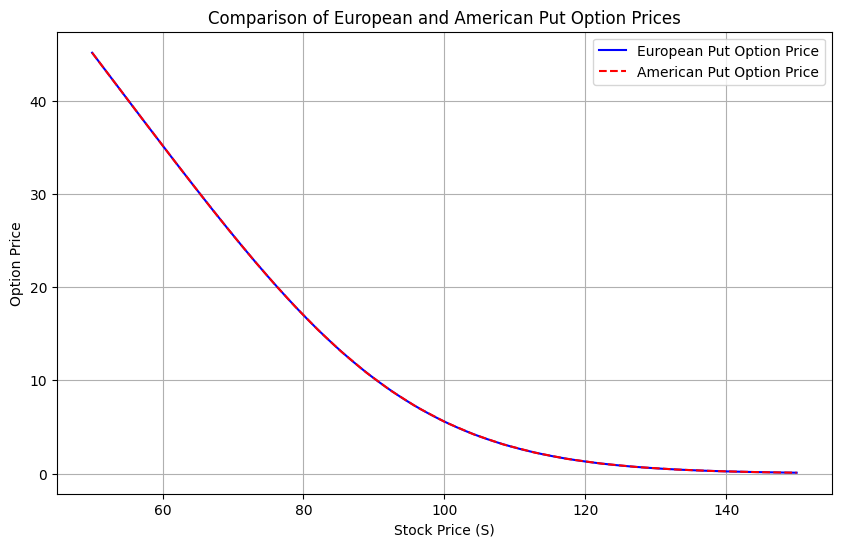

In [84]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Parameters
S = np.linspace(50, 150, 400)  # Range of stock prices
K = 100  # Strike price
r = 0.05  # Risk-free interest rate
T = 1  # Time to expiration (in years)
sigma = 0.2  # Volatility

# Black-Scholes formula for European put option
def european_put_price(S, K, r, T, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    put_price = K * np.exp(-r * T) * norm.cdf(-d2) - S * norm.cdf(-d1)
    return put_price

# Binomial Tree model for American put option
def american_put_price(S, K, r, T, sigma, N=100):
    dt = T / N
    u = np.exp(sigma * np.sqrt(dt))
    d = 1 / u
    p = (np.exp(r * dt) - d) / (u - d)

    # Initialize asset prices at maturity
    asset_prices = np.zeros(N + 1)
    for i in range(N + 1):
        asset_prices[i] = S * (u ** (N - i)) * (d ** i)

    # Initialize option values at maturity
    option_values = np.maximum(0, K - asset_prices)

    # Step back through the tree
    for j in range(N - 1, -1, -1):
        for i in range(j + 1):
            option_values[i] = np.exp(-r * dt) * (p * option_values[i] + (1 - p) * option_values[i + 1])
            option_values[i] = np.maximum(option_values[i], K - asset_prices[i])  # Early exercise

    return option_values[0]

# Calculate option prices
european_put_prices = european_put_price(S, K, r, T, sigma)
american_put_prices = np.array([american_put_price(s, K, r, T, sigma) for s in S])

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(S, european_put_prices, label='European Put Option Price', color='blue')
plt.plot(S, american_put_prices, label='American Put Option Price', color='red', linestyle='--')
plt.xlabel('Stock Price (S)')
plt.ylabel('Option Price')
plt.title('Comparison of European and American Put Option Prices')
plt.legend()
plt.grid(True)
plt.show()


## Step 2

### Q15, Q16 Pricing European Call/Put options using Trinomial Tree

In [85]:
def _gen_stock_vec(nb, h, s0, sigma):
    up = np.exp(sigma * np.sqrt(2 * h))
    down = 1 / up  # down movement to force a "recombining tree"

    vec_u = up * np.ones(nb)
    np.cumprod(vec_u, out=vec_u)  # Computing u, u^2, u^3....u^nb

    vec_d = down * np.ones(nb)
    np.cumprod(vec_d, out=vec_d)  # Computing d, d^2, d^3....d^nb

    res = np.concatenate(
        (vec_d[::-1], [1.0], vec_u)
    )  # putting together the last period tree underlyings
    res *= s0
    return res

In [86]:
def eu_opt_price(K, nb_steps, opttype):  #Number of steps for the tree, N.
    #parameters
    S0 = 100
    r = 0.05
    sigma = 0.2
    T = 0.25
    h = T / nb_steps  # This would be our 'dt' from previous examples
    discount = np.exp(-r * h)  # Define discount factor for simplicity later on

    # Define risk-neutral probabilities:
    pu = (
        (np.exp(r * h / 2) - np.exp(-sigma * np.sqrt(h / 2)))
        / (np.exp(sigma * np.sqrt(h / 2)) - np.exp(-sigma * np.sqrt(h / 2)))
    ) ** 2
    pd = (
        (-np.exp(r * h / 2) + np.exp(sigma * np.sqrt(h / 2)))
        / (np.exp(sigma * np.sqrt(h / 2)) - np.exp(-sigma * np.sqrt(h / 2)))
    ) ** 2
    pm = 1 - pu - pd
    #print(pu, pd, pm)
    # This would be our underlying evolution (Note we are using the function from before!)
    s = _gen_stock_vec(nb_steps, h, S0, sigma=sigma)

    # Define Payoff (in this case, European Call Option)
    if opttype=='C':
      final_payoff = np.maximum(s - K, 0)
    elif opttype=='P':
      final_payoff = np.maximum(K - s, 0)
    else:
      final_payoff = 'error'
    nxt_vec_prices = final_payoff

    # Proceed with iterations for the calculation of payoffs
    for i in range(1, nb_steps + 1):
        vec_stock = _gen_stock_vec(nb_steps - i, h, S0, sigma=sigma)
        expectation = np.zeros(vec_stock.size)

        for j in range(expectation.size):
            tmp = nxt_vec_prices[j] * pd
            tmp += nxt_vec_prices[j + 1] * pm
            tmp += nxt_vec_prices[j + 2] * pu

            expectation[j] = tmp
        # Discount option payoff!
        nxt_vec_prices = discount * expectation

    return nxt_vec_prices[0]  # Notice here we only 'return' the expected discounted value of the option at t=0, that is, the price of the call option!

In [87]:
prices_call_eu = []
prices_put_eu = []
for k in [90, 95, 100, 105, 110]:
  eu_call_price = eu_opt_price(k, nb_steps=256, opttype='C')
  prices_call_eu.append(eu_call_price)
  print('-'*40)
  print("With K = {:3d}, the call price is {:.2f}".format(k, eu_call_price))
print('-'*40)

print('For put oprion:')

for k in [90, 95, 100, 105, 110]:
  eu_put_price = eu_opt_price(k, nb_steps=256, opttype='P')
  prices_put_eu.append(eu_put_price)
  print('-'*40)
  print("With K = {:3d}, the call price is {:.2f}".format(k, eu_put_price))
print('-'*40)

----------------------------------------
With K =  90, the call price is 11.67
----------------------------------------
With K =  95, the call price is 7.71
----------------------------------------
With K = 100, the call price is 4.61
----------------------------------------
With K = 105, the call price is 2.48
----------------------------------------
With K = 110, the call price is 1.19
----------------------------------------
For put oprion:
----------------------------------------
With K =  90, the call price is 0.55
----------------------------------------
With K =  95, the call price is 1.53
----------------------------------------
With K = 100, the call price is 3.37
----------------------------------------
With K = 105, the call price is 6.18
----------------------------------------
With K = 110, the call price is 9.82
----------------------------------------


### 17. Pricing American Call option using Trinomial Tree

In [88]:
def calculate_strike_prices(S0, moneyness_levels):
    strike_prices = []
    for moneyness in moneyness_levels:
        K = S0 * moneyness
        strike_prices.append(K)
    return strike_prices


S0 = 100
moneyness_levels = [0.9, 0.95, 1.0, 1.05, 1.1]


strike_prices = calculate_strike_prices(S0, moneyness_levels)

for i, K in enumerate(strike_prices):
    moneyness_type = ""
    if i == 0:
        moneyness_type = "Deep OTM"
    elif i == 1:
        moneyness_type = "OTM"
    elif i == 2:
        moneyness_type = "ATM"
    elif i == 3:
        moneyness_type = "ITM"
    elif i == 4:
        moneyness_type = "Deep ITM"

    print(f"{moneyness_type}: Strike Price = {K:.2f}")

Deep OTM: Strike Price = 90.00
OTM: Strike Price = 95.00
ATM: Strike Price = 100.00
ITM: Strike Price = 105.00
Deep ITM: Strike Price = 110.00


In [89]:
def _gen_stock_vec(nb, h):
    s0 = 100
    sigma = 0.20
    up = np.exp(sigma * np.sqrt(2 * h))
    down = 1 / up  # down movement to force a "recombining tree"

    vec_u = up * np.ones(nb)
    np.cumprod(vec_u, out=vec_u)  # Computing u, u^2, u^3....u^nb

    vec_d = down * np.ones(nb)
    np.cumprod(vec_d, out=vec_d)  # Computing d, d^2, d^3....d^nb

    res = np.concatenate(
        (vec_d[::-1], [1.0], vec_u)
    )  # putting together the last period tree underlyings
    res *= s0
    return res


In [90]:
def price_american_call(K):
    # Define parameters
    r = 0.05  # Risk-free rate
    sigma = 0.20  # Volatility
    T = 0.25  # Time to expiration
    nb_steps = 100 # nb-steps
    h = T / nb_steps  # Time step size (dt)
    discount = np.exp(-r * h)  # Discount factor for simplicity later on

    # Risk-neutral probabilities
    pu = ((np.exp(r * h / 2) - np.exp(-sigma * np.sqrt(h / 2))) /
          (np.exp(sigma * np.sqrt(h / 2)) - np.exp(-sigma * np.sqrt(h / 2)))) ** 2
    pd = ((-np.exp(r * h / 2) + np.exp(sigma * np.sqrt(h / 2))) /
          (np.exp(sigma * np.sqrt(h / 2)) - np.exp(-sigma * np.sqrt(h / 2)))) ** 2
    pm = 1 - pu - pd

    # Generate stock price vector
    s = _gen_stock_vec(nb_steps, h)

    # Payoff American Call option

    payoff = np.maximum(s - K, 0)

    nxt_vec_prices = payoff  # Initialize option prices with payoff

    # Iterate backward for the calculation of option prices
    for i in range(1, nb_steps + 1):
        vec_stock = _gen_stock_vec(nb_steps - i, h)
        expectation = np.zeros(vec_stock.size)

        for j in range(expectation.size):
            tmp = nxt_vec_prices[j] * pd
            tmp += nxt_vec_prices[j + 1] * pm
            tmp += nxt_vec_prices[j + 2] * pu

            # Early exercise check for American Call Option
            early_exercise = np.maximum(s[j] - K, 0)

            expectation[j] = max(tmp, early_exercise)  # Compare with early exercise

        nxt_vec_prices = discount * expectation  # Discount option payoff

    return nxt_vec_prices[0]



In [91]:
price_call = []
for K in [90, 95, 100, 105, 110]:
  american_call_price = price_american_call(K)
  price_call.append(american_call_price)
  print("With K = {:3d}, the call price is {:.2f}".format(K, american_call_price))

With K =  90, the call price is 11.67
With K =  95, the call price is 7.72
With K = 100, the call price is 4.61
With K = 105, the call price is 2.48
With K = 110, the call price is 1.19


### 18. Pricing American Put option using Trinomial Tree

In [92]:
def price_american_put(K):
    # Define parameters
    r = 0.05  # Risk-free rate
    sigma = 0.20  # Volatility
    T = 0.25  # Time to expiration
    nb_steps = 100 # nb-steps
    h = T / nb_steps  # Time step size (dt)
    discount = np.exp(-r * h)  # Discount factor for simplicity later on

    # Risk-neutral probabilities
    pu = ((np.exp(r * h / 2) - np.exp(-sigma * np.sqrt(h / 2))) /
          (np.exp(sigma * np.sqrt(h / 2)) - np.exp(-sigma * np.sqrt(h / 2)))) ** 2
    pd = ((-np.exp(r * h / 2) + np.exp(sigma * np.sqrt(h / 2))) /
          (np.exp(sigma * np.sqrt(h / 2)) - np.exp(-sigma * np.sqrt(h / 2)))) ** 2
    pm = 1 - pu - pd

    # Generate stock price vector
    s = _gen_stock_vec(nb_steps, h)
    payoff = np.maximum(K - s, 0) # Payoff American Put option

    nxt_vec_prices = payoff  # Initialize option prices with payoff

    # Iterate backward for the calculation of option prices
    for i in range(1, nb_steps + 1):
        vec_stock = _gen_stock_vec(nb_steps - i, h)
        expectation = np.zeros(vec_stock.size)

        for j in range(expectation.size):
            tmp = nxt_vec_prices[j] * pd
            tmp += nxt_vec_prices[j + 1] * pm
            tmp += nxt_vec_prices[j + 2] * pu

            # Early exercise check for American put Option
            early_exercise = np.maximum(K - s[j], 0)

            expectation[j] = max(tmp, early_exercise)  # Compare with early exercise

        nxt_vec_prices = discount * expectation  # Discount option payoff

    return nxt_vec_prices[0]


In [93]:
price_put = []
for K in [90, 95, 100, 105, 110]:
  american_put_price = price_american_put(K)
  price_put.append(american_put_price)
  print("With K = {:3d}, the put price is {:.2f}".format(K, american_put_price))

With K =  90, the put price is 65.68
With K =  95, the put price is 70.68
With K = 100, the put price is 75.68
With K = 105, the put price is 80.68
With K = 110, the put price is 85.68


### Q19

**Graph #1:** Graph European call prices and put prices versus stock prices.

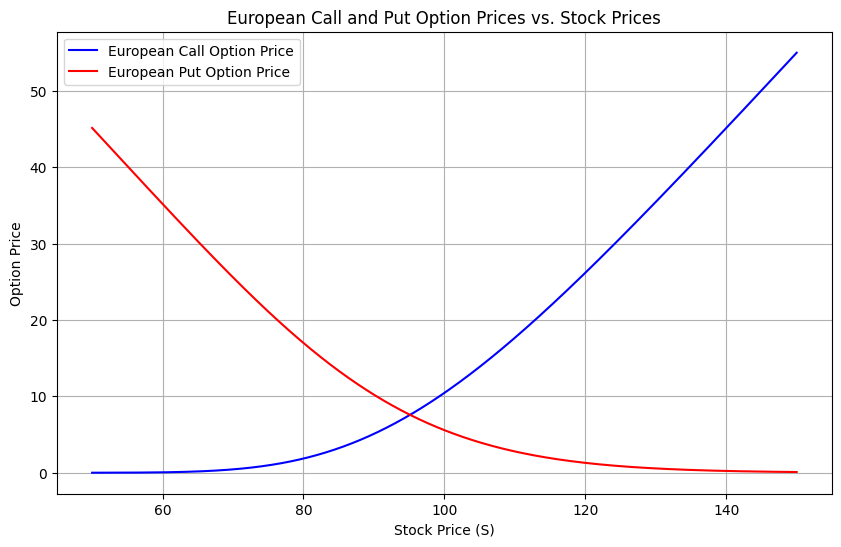

In [94]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Parameters
S = np.linspace(50, 150, 400)  # Range of stock prices
K = 100  # Strike price
r = 0.05  # Risk-free interest rate
T = 1  # Time to expiration (in years)
sigma = 0.2  # Volatility

# Black-Scholes formula for European call option
def european_call_price(S, K, r, T, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    call_price = S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    return call_price

# Black-Scholes formula for European put option
def european_put_price(S, K, r, T, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    put_price = K * np.exp(-r * T) * norm.cdf(-d2) - S * norm.cdf(-d1)
    return put_price

# Calculate option prices
european_call_prices = european_call_price(S, K, r, T, sigma)
european_put_prices = european_put_price(S, K, r, T, sigma)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(S, european_call_prices, label='European Call Option Price', color='blue')
plt.plot(S, european_put_prices, label='European Put Option Price', color='red')
plt.xlabel('Stock Price (S)')
plt.ylabel('Option Price')
plt.title('European Call and Put Option Prices vs. Stock Prices')
plt.legend()
plt.grid(True)
plt.show()


### Q20

**Graph #2:** Graph American call prices and put prices versus stock prices.

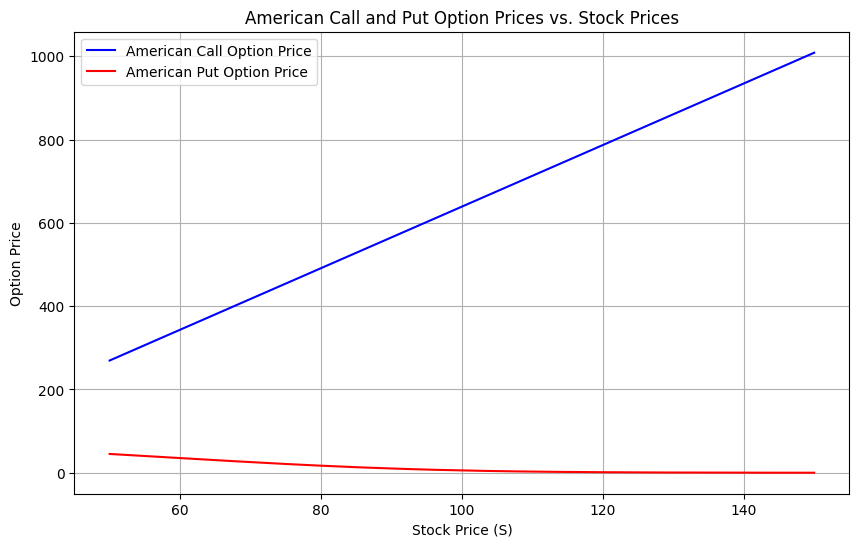

In [95]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
S = np.linspace(50, 150, 400)  # Range of stock prices
K = 100  # Strike price
r = 0.05  # Risk-free interest rate
T = 1  # Time to expiration (in years)
sigma = 0.2  # Volatility
N = 100  # Number of binomial steps

# Binomial Tree model for American call option
def american_call_price(S, K, r, T, sigma, N):
    dt = T / N
    u = np.exp(sigma * np.sqrt(dt))
    d = 1 / u
    p = (np.exp(r * dt) - d) / (u - d)

    # Initialize asset prices at maturity
    asset_prices = np.zeros(N + 1)
    for i in range(N + 1):
        asset_prices[i] = S * (u ** (N - i)) * (d ** i)

    # Initialize option values at maturity
    option_values = np.maximum(0, asset_prices - K)

    # Step back through the tree
    for j in range(N - 1, -1, -1):
        for i in range(j + 1):
            option_values[i] = np.exp(-r * dt) * (p * option_values[i] + (1 - p) * option_values[i + 1])
            option_values[i] = np.maximum(option_values[i], asset_prices[i] - K)  # Early exercise

    return option_values[0]

# Binomial Tree model for American put option
def american_put_price(S, K, r, T, sigma, N):
    dt = T / N
    u = np.exp(sigma * np.sqrt(dt))
    d = 1 / u
    p = (np.exp(r * dt) - d) / (u - d)

    # Initialize asset prices at maturity
    asset_prices = np.zeros(N + 1)
    for i in range(N + 1):
        asset_prices[i] = S * (u ** (N - i)) * (d ** i)

    # Initialize option values at maturity
    option_values = np.maximum(0, K - asset_prices)

    # Step back through the tree
    for j in range(N - 1, -1, -1):
        for i in range(j + 1):
            option_values[i] = np.exp(-r * dt) * (p * option_values[i] + (1 - p) * option_values[i + 1])
            option_values[i] = np.maximum(option_values[i], K - asset_prices[i])  # Early exercise

    return option_values[0]

# Calculate option prices
american_call_prices = np.array([american_call_price(s, K, r, T, sigma, N) for s in S])
american_put_prices = np.array([american_put_price(s, K, r, T, sigma, N) for s in S])

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(S, american_call_prices, label='American Call Option Price', color='blue')
plt.plot(S, american_put_prices, label='American Put Option Price', color='red')
plt.xlabel('Stock Price (S)')
plt.ylabel('Option Price')
plt.title('American Call and Put Option Prices vs. Stock Prices')
plt.legend()
plt.grid(True)
plt.show()


### Q21

**Graph #3:** Graph European and American call prices versus strike.

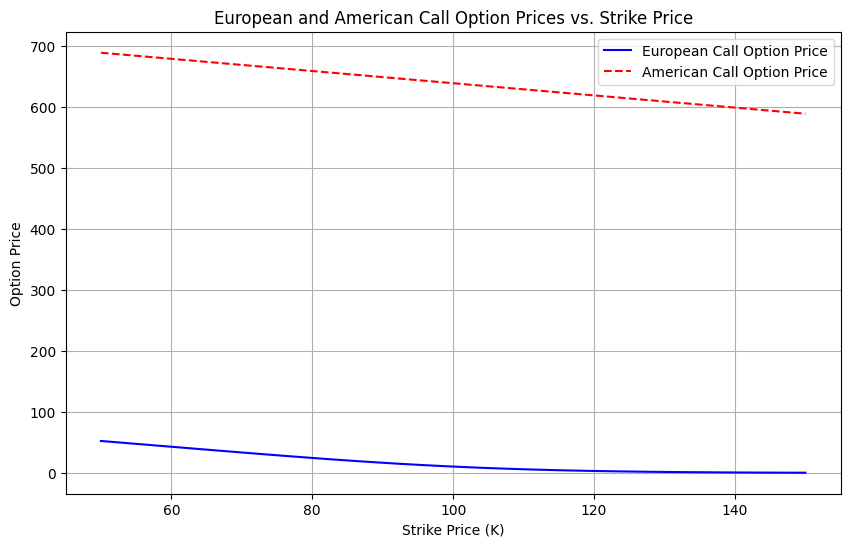

In [96]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Parameters
K_values = np.linspace(50, 150, 100)  # Range of strike prices
S = 100  # Stock price
r = 0.05  # Risk-free interest rate
T = 1  # Time to expiration (in years)
sigma = 0.2  # Volatility
N = 100  # Number of binomial steps

# Black-Scholes formula for European call option
def european_call_price(S, K, r, T, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    call_price = S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    return call_price

# Binomial Tree model for American call option
def american_call_price(S, K, r, T, sigma, N):
    dt = T / N
    u = np.exp(sigma * np.sqrt(dt))
    d = 1 / u
    p = (np.exp(r * dt) - d) / (u - d)

    # Initialize asset prices at maturity
    asset_prices = np.zeros(N + 1)
    for i in range(N + 1):
        asset_prices[i] = S * (u ** (N - i)) * (d ** i)

    # Initialize option values at maturity
    option_values = np.maximum(0, asset_prices - K)

    # Step back through the tree
    for j in range(N - 1, -1, -1):
        for i in range(j + 1):
            option_values[i] = np.exp(-r * dt) * (p * option_values[i] + (1 - p) * option_values[i + 1])
            option_values[i] = np.maximum(option_values[i], asset_prices[i] - K)  # Early exercise

    return option_values[0]

# Calculate option prices for European and American calls
european_call_prices = [european_call_price(S, K, r, T, sigma) for K in K_values]
american_call_prices = [american_call_price(S, K, r, T, sigma, N) for K in K_values]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(K_values, european_call_prices, label='European Call Option Price', color='blue')
plt.plot(K_values, american_call_prices, label='American Call Option Price', color='red', linestyle='--')
plt.xlabel('Strike Price (K)')
plt.ylabel('Option Price')
plt.title('European and American Call Option Prices vs. Strike Price')
plt.legend()
plt.grid(True)
plt.show()


### Q22

**Graph #4:** Graph European and American put prices versus strike.

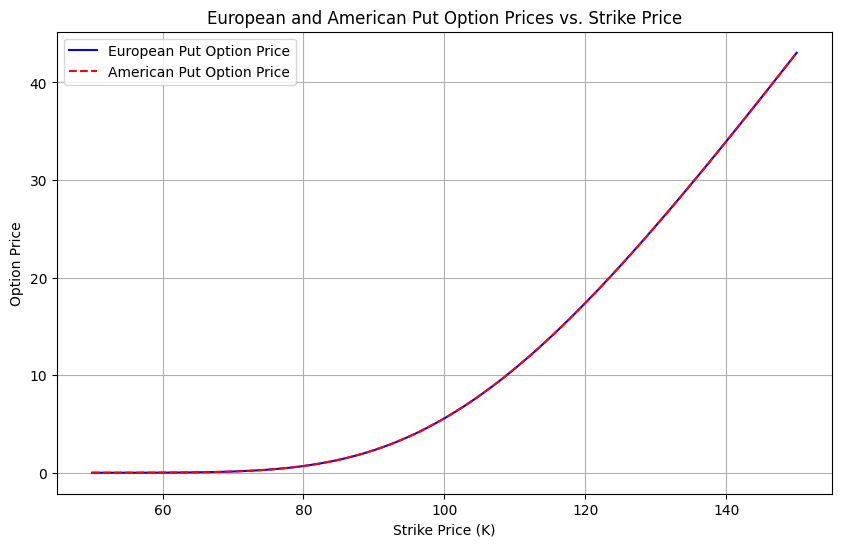

In [97]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Parameters
K_values = np.linspace(50, 150, 100)  # Range of strike prices
S = 100  # Stock price
r = 0.05  # Risk-free interest rate
T = 1  # Time to expiration (in years)
sigma = 0.2  # Volatility
N = 100  # Number of binomial steps

# Black-Scholes formula for European put option
def european_put_price(S, K, r, T, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    put_price = K * np.exp(-r * T) * norm.cdf(-d2) - S * norm.cdf(-d1)
    return put_price

# Binomial Tree model for American put option
def american_put_price(S, K, r, T, sigma, N):
    dt = T / N
    u = np.exp(sigma * np.sqrt(dt))
    d = 1 / u
    p = (np.exp(r * dt) - d) / (u - d)

    # Initialize asset prices at maturity
    asset_prices = np.zeros(N + 1)
    for i in range(N + 1):
        asset_prices[i] = S * (u ** (N - i)) * (d ** i)

    # Initialize option values at maturity
    option_values = np.maximum(0, K - asset_prices)

    # Step back through the tree
    for j in range(N - 1, -1, -1):
        for i in range(j + 1):
            option_values[i] = np.exp(-r * dt) * (p * option_values[i] + (1 - p) * option_values[i + 1])
            option_values[i] = np.maximum(option_values[i], K - asset_prices[i])  # Early exercise

    return option_values[0]

# Calculate option prices for European and American puts
european_put_prices = [european_put_price(S, K, r, T, sigma) for K in K_values]
american_put_prices = [american_put_price(S, K, r, T, sigma, N) for K in K_values]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(K_values, european_put_prices, label='European Put Option Price', color='blue')
plt.plot(K_values, american_put_prices, label='American Put Option Price', color='red', linestyle='--')
plt.xlabel('Strike Price (K)')
plt.ylabel('Option Price')
plt.title('European and American Put Option Prices vs. Strike Price')
plt.legend()
plt.grid(True)
plt.show()


### Q23: TBD

Strike	Call	Put	LHS (Call - Put)	RHS (S - K * exp(-rT))
90.00	11.67	0.55	11.12	11.12
95.00	7.71	1.53	6.18	6.18
100.00	4.61	3.37	1.24	1.24
105.00	2.48	6.18	-3.70	-3.70
110.00	1.19	9.82	-8.63	-8.63


<Figure size 1000x600 with 0 Axes>

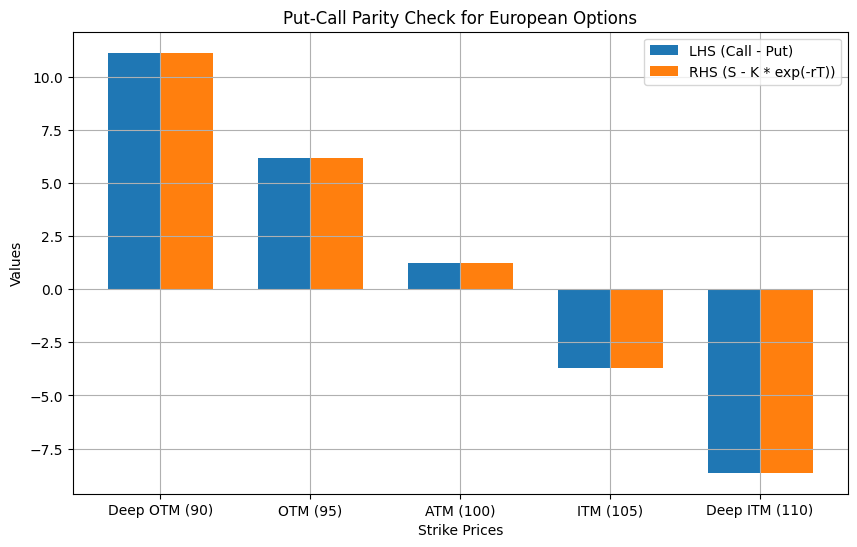

In [98]:
import numpy as np
import matplotlib.pyplot as plt

# Given data
# Strike prices and option prices
strike_prices = np.array([90, 95, 100, 105, 110])
call_prices = np.array([11.67, 7.71, 4.61, 2.48, 1.19])
put_prices = np.array([0.55, 1.53, 3.37, 6.18, 9.82])

# Parameters
S = 100  # Stock price
r = 0.05  # Risk-free interest rate
T = 0.25  # Time to expiration (in years)

# Calculate LHS and RHS of the put-call parity equation
lhs_values = np.array(call_prices) - np.array(put_prices)
rhs_values = np.array([S - K * np.exp(-r * T) for K in strike_prices])

# Print the results
print("Strike\tCall\tPut\tLHS (Call - Put)\tRHS (S - K * exp(-rT))")
for i, K in enumerate(strike_prices):
    print(f"{K:.2f}\t{call_prices[i]:.2f}\t{put_prices[i]:.2f}\t{lhs_values[i]:.2f}\t{rhs_values[i]:.2f}")

# Plotting the results
plt.figure(figsize=(10, 6))
strike_labels = ['Deep OTM (90)', 'OTM (95)', 'ATM (100)', 'ITM (105)', 'Deep ITM (110)']
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(np.arange(len(strike_prices)) - width/2, lhs_values, width, label='LHS (Call - Put)')
bars2 = ax.bar(np.arange(len(strike_prices)) + width/2, rhs_values, width, label='RHS (S - K * exp(-rT))')

ax.set_xlabel('Strike Prices')
ax.set_ylabel('Values')
ax.set_title('Put-Call Parity Check for European Options')
ax.set_xticks(np.arange(len(strike_prices)))
ax.set_xticklabels(strike_labels)
ax.legend()

plt.grid(True)
plt.show()


### Q24

For the 5 strikes that your group member computed in Q17 and Q18, check
whether put-call parity holds (within sensible rounding). Briefly comment on the
reasons why/why not this is the case.

Strike	Call	Put	LHS (Call - Put)	RHS (S - K * exp(-rT))
90.00	11.67	0.56	11.11	11.12
95.00	7.72	1.58	6.14	6.18
100.00	4.61	3.48	1.13	1.24
105.00	2.48	6.43	-3.95	-3.70
110.00	1.19	10.33	-9.14	-8.63


<Figure size 1000x600 with 0 Axes>

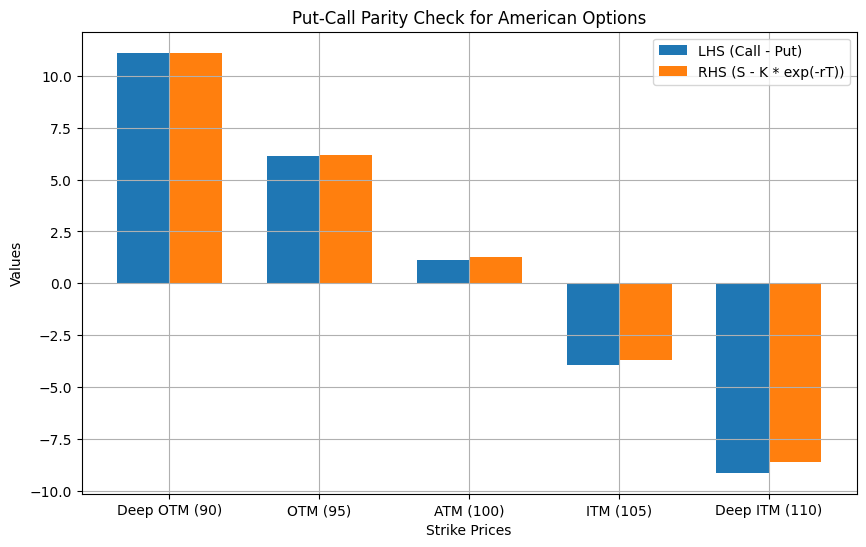

In [99]:
import numpy as np
import matplotlib.pyplot as plt

# Given data
strike_prices = [90, 95, 100, 105, 110]
call_prices = [11.67, 7.72, 4.61, 2.48, 1.19]
put_prices = [0.56, 1.58, 3.48, 6.43, 10.33]

# Parameters
S = 100  # Stock price
r = 0.05  # Risk-free interest rate
T = 0.25  # Time to expiration (in years)

# Calculate LHS and RHS of the put-call parity equation
lhs_values = np.array(call_prices) - np.array(put_prices)
rhs_values = np.array([S - K * np.exp(-r * T) for K in strike_prices])

# Print the results
print("Strike\tCall\tPut\tLHS (Call - Put)\tRHS (S - K * exp(-rT))")
for i, K in enumerate(strike_prices):
    print(f"{K:.2f}\t{call_prices[i]:.2f}\t{put_prices[i]:.2f}\t{lhs_values[i]:.2f}\t{rhs_values[i]:.2f}")

# Plotting the results
plt.figure(figsize=(10, 6))
strike_labels = ['Deep OTM (90)', 'OTM (95)', 'ATM (100)', 'ITM (105)', 'Deep ITM (110)']
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(np.arange(len(strike_prices)) - width/2, lhs_values, width, label='LHS (Call - Put)')
bars2 = ax.bar(np.arange(len(strike_prices)) + width/2, rhs_values, width, label='RHS (S - K * exp(-rT))')

ax.set_xlabel('Strike Prices')
ax.set_ylabel('Values')
ax.set_title('Put-Call Parity Check for American Options')
ax.set_xticks(np.arange(len(strike_prices)))
ax.set_xticklabels(strike_labels)
ax.legend()

plt.grid(True)
plt.show()


## Step 3

###Q26 Dynamic Delta Hedging. Computing the delta hedging needed at each node in each step.
S0=180, r =2%, sigma=25%, T=6 months, K = 182:

In [100]:
def american_option(S_ini, K, T, r, sigma, N, opttype):
    dt = T / N  # Define time step
    u: float = np.exp(sigma * np.sqrt(dt))
    d: float = np.exp(-sigma * np.sqrt(dt))
    p: float = (np.exp(r * dt) - d) / (u - d)
    C = np.zeros([N + 1, N + 1])  # call prices
    S = np.zeros([N + 1, N + 1])  # underlying price
    Delta = np.zeros([N, N])  # delta

    for i in range(0, N + 1):
        S[N, i] = S_ini * (u ** (i)) * (d ** (N - i))
        if opttype == "C":
            C[N, i] = max(S[N, i] - K, 0)
        else:
            C[N, i] = max(K - S[N, i], 0)

    for j in range(N - 1, -1, -1):
        for i in range(0, j + 1):
            C[j, i] = np.exp(-r * dt) * (
                p * C[j + 1, i + 1] + (1 - p) * C[j + 1, i]
            )  # Computing the European option prices
            S[j, i] = (
                S_ini * (u ** (i)) * (d ** (j - i))
            )  # Underlying evolution for each node
            if opttype == "C":
                C[j, i] = max(
                    C[j, i], S[j, i] - K
                )  # Decision between the European option price and the payoff from early-exercise
            else:
                C[j, i] = max(
                    C[j, i], K - S[j, i]
                )  # Decision between the European option price and the payoff from early-exercise

            Delta[j, i] = (C[j + 1, i + 1] - C[j + 1, i]) / (
                S[j + 1, i + 1] - S[j + 1, i]
            )  # Computing the delta for each node

    return C[0, 0], C, S, Delta

In [101]:
S_0 = 180
K = 182
T=0.5
r=0.02
sig = 0.25

In [102]:
# Put option
price, P_am_tree, S_am_tree, delta_am_tree = american_option(S_ini=S_0, K=K, T=T, r=r, sigma=sig, N=25, opttype='P')
price

13.03571894719869

In [103]:
np.round(delta_am_tree, 2)

array([[-0.48,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
         0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
         0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ],
       [-0.56, -0.4 ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
         0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
         0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ],
       [-0.65, -0.48, -0.32,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
         0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
         0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ],
       [-0.73, -0.57, -0.39, -0.24,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
         0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
         0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ],
       [-0.81, -0.66, -0.48, -0.31, -0.18,  0.  ,  0.  ,  0.  ,  0.  ,
         0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
         0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ],


In [104]:
delta_am_tree[1][0]

-0.5608058024521152

In [105]:
dt = T / 25  # Time step
u = np.exp(sig * np.sqrt(dt))  # Up factor
d = 1 / u  # Down factor
p = (np.exp(r * dt) - d) / (u - d)  # Risk-neutral probability

path_am_put = [S_0]
deltas_list = []
cash_account_am = 0

for i in range(25):
    current_price = path_am_put[-1]
    if current_price == S_am_tree[i, 0]:
        delta = delta_am_tree[i, 0]
    else:
        delta = delta_am_tree[i, i]
    deltas_list.append(delta)
    # Adjust cash account
    if i > 0:
        cash_account_am *= np.exp(r * dt)
    cash_account_am += deltas_list[-1] * (current_price - path_am_put[-1])
    # Simulate the next step
    if np.random.rand() < p:
        next_price = current_price * u
    else:
        next_price = current_price * d
    path_am_put.append(next_price)

cash_account_am = [0]  # Initial cash account
current_cash_account_am = 0

for i in range(25):
    if i > 0:
        current_cash_account_am *= np.exp(r * dt)
    current_cash_account_am += deltas_list[i] * (path_am_put[i + 1] - path_am_put[i])
    cash_account_am.append(current_cash_account_am)

In [106]:
np.round(path_am_put, 2)

array([180.  , 173.75, 167.71, 161.89, 167.71, 161.89, 156.26, 161.89,
       167.71, 173.75, 180.  , 186.48, 180.  , 173.75, 180.  , 173.75,
       167.71, 173.75, 180.  , 186.48, 180.  , 186.48, 193.19, 200.14,
       207.34, 214.81])

In [107]:
np.round(deltas_list, 2)

array([-0.48, -0.56, -0.65, -0.24, -0.18, -0.12, -0.08, -0.04, -0.02,
       -0.01, -0.  , -0.  , -0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,
        0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ,  0.  ])

In [108]:
np.round(cash_account_am, 2)

array([ 0.  ,  2.97,  6.36, 10.14,  8.73,  9.76, 10.44, 10.02,  9.77,
        9.64,  9.58,  9.56,  9.57,  9.58,  9.58,  9.58,  9.59,  9.59,
        9.6 ,  9.6 ,  9.6 ,  9.61,  9.61,  9.62,  9.62,  9.62])

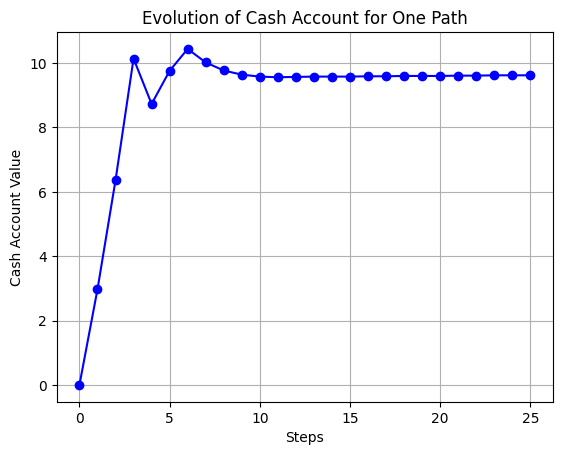

In [109]:
plt.plot(np.round(cash_account_am, 2), marker='o', color='blue')
plt.xlabel('Steps')
plt.ylabel('Cash Account Value')
plt.title('Evolution of Cash Account for One Path')
plt.grid(True)
plt.show()

### Q27

The price of the Asian ATM Put option is: 35.73
Stock price path: [180, 186.47779865799848, 180.0, 186.47779865799848, 193.18871884629456, 186.47779865799848, 180.0, 173.7472247804781, 167.711656216211, 173.74722478047806, 179.99999999999997, 173.74722478047806, 179.99999999999997, 173.74722478047806, 179.99999999999997, 173.74722478047806, 167.71165621621097, 173.74722478047804, 167.71165621621094, 161.88574906057926, 156.2622201710252, 150.83403940417597, 145.59442082724917, 140.53681423475322, 135.65489695987756, 130.94256597033578]
Deltas at each step: [-0.581399216488664, -0.5624487757376982, -0.6166758847795208, -0.6279232313572793, -0.6363086129870127, -0.6428653617182787, -0.6484244846887632, -0.6535477717984857, -0.658546155251422, -0.6635532069116011, -0.6686091139717784, -0.6737207292989266, -0.67888876883467, -0.6841139585242596, -0.689397034463842, -0.6947387430499369, -0.7001398411312478, -0.705601096162732, -0.7111232863620557, -0.7167072008684463, -0.7223536399039502, -

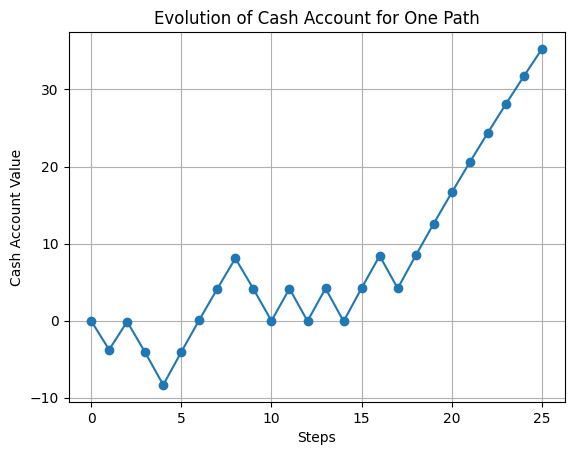

In [110]:
import numpy as np

# Parameters
S0 = 180  # Initial stock price
K = 182  # Strike price
r = 0.02  # Risk-free interest rate
sigma = 0.25  # Volatility
T = 0.5  # Time to maturity (in years)
N = 25  # Number of steps in the binomial tree
dt = T / N  # Time step
u = np.exp(sigma * np.sqrt(dt))  # Up factor
d = 1 / u  # Down factor
p = (np.exp(r * dt) - d) / (u - d)  # Risk-neutral probability

# Initialize stock price tree
stock_tree = np.zeros((N + 1, N + 1))
stock_tree[0, 0] = S0

for i in range(1, N + 1):
    stock_tree[i, 0] = stock_tree[i - 1, 0] * u
    for j in range(1, i + 1):
        stock_tree[i, j] = stock_tree[i - 1, j - 1] * d

# Initialize option value tree
option_tree = np.zeros((N + 1, N + 1))

# Compute average price at maturity and option values at maturity
average_prices = np.zeros((N + 1, N + 1))
for j in range(N + 1):
    for i in range(j, N + 1):
        average_prices[i, j] = np.mean(stock_tree[j:i+1, j])
        option_tree[N, j] = max(K - average_prices[N, j], 0)

# Backward induction to calculate option price at each node
for i in range(N - 1, -1, -1):
    for j in range(i + 1):
        option_tree[i, j] = np.exp(-r * dt) * (p * option_tree[i + 1, j] + (1 - p) * option_tree[i + 1, j + 1])

# Calculate delta at each node
delta_tree = np.zeros((N, N))
for i in range(N):
    for j in range(i + 1):
        delta_tree[i, j] = (option_tree[i + 1, j] - option_tree[i + 1, j + 1]) / (stock_tree[i + 1, j] - stock_tree[i + 1, j + 1])

# Print the option price
print(f"The price of the Asian ATM Put option is: {option_tree[0, 0]:.2f}")

# Delta hedging process for one path
path = [S0]
deltas = []
cash_account = 0

for i in range(N):
    current_price = path[-1]
    if current_price == stock_tree[i, 0]:
        delta = delta_tree[i, 0]
    else:
        delta = delta_tree[i, i]
    deltas.append(delta)
    # Adjust cash account
    if i > 0:
        cash_account *= np.exp(r * dt)
    cash_account += deltas[-1] * (current_price - path[-1])
    # Simulate the next step
    if np.random.rand() < p:
        next_price = current_price * u
    else:
        next_price = current_price * d
    path.append(next_price)

# Print the results
print("Stock price path:", path)
print("Deltas at each step:", deltas)
print("Cash account evolution:", cash_account)

# Plot the evolution of the cash account
import matplotlib.pyplot as plt

cash_account_values = [0]  # Initial cash account
current_cash_account = 0

for i in range(N):
    if i > 0:
        current_cash_account *= np.exp(r * dt)
    current_cash_account += deltas[i] * (path[i + 1] - path[i])
    cash_account_values.append(current_cash_account)

plt.plot(range(N + 1), cash_account_values, marker='o')
plt.xlabel('Steps')
plt.ylabel('Cash Account Value')
plt.title('Evolution of Cash Account for One Path')
plt.grid(True)
plt.show()

